In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from ucimlrepo import fetch_ucirepo 

In [6]:
wholesale_customers = fetch_ucirepo(id=292) 

In [7]:
x = wholesale_customers.data.features 
y = wholesale_customers.data.targets 

In [9]:
df = pd.concat([x,y],axis =1)

In [10]:
df

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,12669,9656,7561,214,2674,1338,3
1,2,7057,9810,9568,1762,3293,1776,3
2,2,6353,8808,7684,2405,3516,7844,3
3,1,13265,1196,4221,6404,507,1788,3
4,2,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,3
436,1,39228,1431,764,4510,93,2346,3
437,2,14531,15488,30243,437,14841,1867,3
438,1,10290,1981,2232,1038,168,2125,3


In [11]:
df.isnull().sum()

Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Region              0
dtype: int64

In [12]:
df.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,2.543182
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.774272
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,2.000000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,3.000000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,3.000000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,3.000000


In [13]:
x = df.drop(["Channel"],axis = 1)
y = df["Channel"]

In [14]:
y.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [15]:
y[y==2]=0
y[y==1] = 1

In [16]:
y

0      0
1      0
2      0
3      1
4      0
      ..
435    1
436    1
437    0
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [20]:
# Now, I will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports 
# and gives it acclaimed performance and efficiency gains. I will do it as follows.
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data = x , label = y)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.33 , random_state = 42)

In [23]:
x_train.shape , x_test.shape

((294, 7), (146, 7))

In [24]:
from xgboost import XGBClassifier

In [25]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }

In [27]:
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)
# fit the classifier to the training data
xgb_clf.fit(x_train, y_train)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [28]:
y_pred = xgb_clf.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test , y_pred)

0.9246575342465754

In [31]:
from xgboost import cv

In [32]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}


In [33]:
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [35]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.603167,0.056044,0.568473,0.037346
1,0.849821,0.106553,0.795915,0.135746
2,0.853351,0.114809,0.787454,0.137119
3,0.937047,0.009709,0.905427,0.023855
4,0.940378,0.008390,0.913488,0.026678


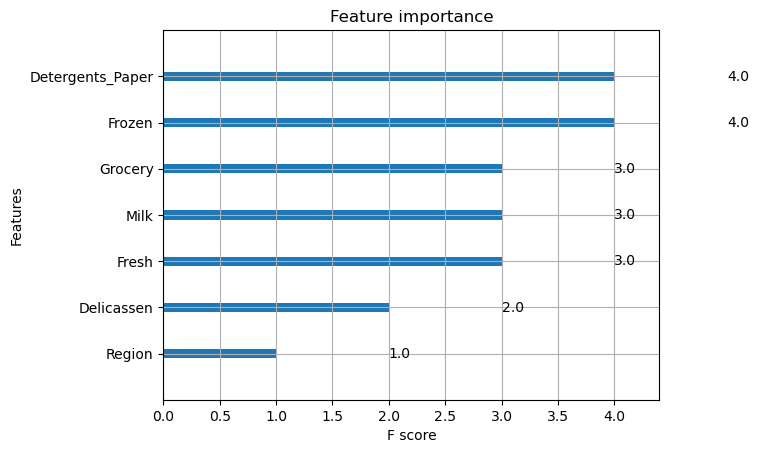

In [36]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()